# Fake News Detection Project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Importing dataset

In [2]:
df = pd.read_csv("news.csv")
df = df[['title', 'text', 'label']]
df = df.dropna()

In [3]:
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [5]:
def clean_text(text):
    text = text.lower()                             # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()          # remove extra spaces
    return text

In [6]:
df['title'] = df['title'].apply(clean_text)
df['text'] = df['text'].apply(clean_text)

### Feature Extraction

In [7]:
df['title_length'] = df['title'].apply(len)
df['text_length'] = df['text'].apply(len)
df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
df['text_word_count'] = df['text'].apply(lambda x: len(x.split()))
df['num_exclamations'] = df['text'].apply(lambda x: x.count('!'))  # After cleaning, likely 0
df['num_uppercase_words'] = df['text'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))  # After lowercase cleaning, will be 0 too

### Dependent and Independent variables

In [8]:
X = df[['title_length', 'text_length', 'title_word_count', 'text_word_count', 'num_exclamations', 'num_uppercase_words']]
y = df[['label']]

In [9]:
X

,title_length,text_length,title_word_count,text_word_count,num_exclamations,num_uppercase_words
0,27,7335,5,1295,0,0
1,83,2530,14,437,0,0
2,43,2474,9,429,0,0
3,80,2462,15,377,0,0
4,47,1753,9,313,0,0
...,...,...,...,...,...,...
6330,68,3901,11,632,0,0
6331,53,13645,10,2148,0,0
6332,59,11701,8,1937,0,0
6333,65,6673,11,1097,0,0


In [10]:
y

,label
0,FAKE
1,FAKE
2,REAL
3,FAKE
4,REAL
...,...
6330,REAL
6331,FAKE
6332,FAKE
6333,REAL


### Spliting the dataset into training and testing set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train

,title_length,text_length,title_word_count,text_word_count,num_exclamations,num_uppercase_words
1142,54,157,7,23,0,0
2654,61,609,12,109,0,0
5395,52,2051,9,366,0,0
1170,37,2949,6,531,0,0
4371,68,2551,10,408,0,0
...,...,...,...,...,...,...
3772,113,8344,19,1501,0,0
5191,53,4937,9,862,0,0
5226,59,1978,9,327,0,0
5390,61,6867,12,1198,0,0


In [13]:
y_train

,label
1142,REAL
2654,FAKE
5395,FAKE
1170,FAKE
4371,FAKE
...,...
3772,REAL
5191,FAKE
5226,FAKE
5390,REAL


In [14]:
X_test

,title_length,text_length,title_word_count,text_word_count,num_exclamations,num_uppercase_words
1357,24,7106,3,1160,0,0
2080,68,3004,10,503,0,0
2718,69,18319,11,3106,0,0
812,65,1135,10,193,0,0
4886,47,1487,9,249,0,0
...,...,...,...,...,...,...
1512,82,10040,14,1646,0,0
57,33,6531,4,1085,0,0
6092,81,10435,15,1720,0,0
3403,61,1007,11,158,0,0


In [15]:
y_test

,label
1357,FAKE
2080,FAKE
2718,FAKE
812,FAKE
4886,FAKE
...,...
1512,FAKE
57,REAL
6092,REAL
3403,REAL


## Logistic Regression

### Training the dataset

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Predicting the result

In [17]:
y_pred = lr.predict(X_test)
print('Logistic Regression\n')
cm = confusion_matrix(y_test,y_pred)
print(f'Accuracy Score : {accuracy_score(y_test,y_pred)}')
print("\n",classification_report(y_test,y_pred))

Logistic Regression

Accuracy Score : 0.6393054459352802

               precision    recall  f1-score   support

        FAKE       0.63      0.64      0.64       628
        REAL       0.64      0.64      0.64       639

    accuracy                           0.64      1267
   macro avg       0.64      0.64      0.64      1267
weighted avg       0.64      0.64      0.64      1267



### Visualisation of the result

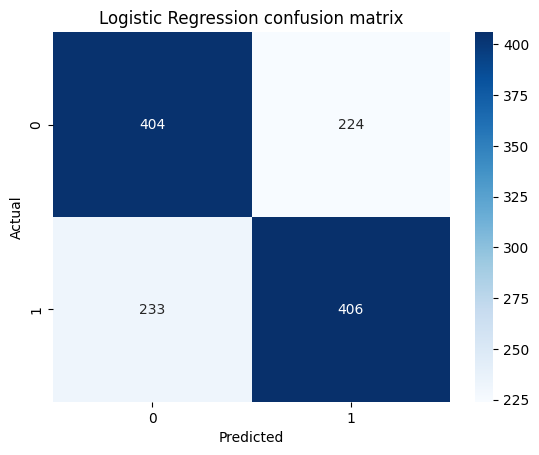

In [18]:
sns.heatmap(cm,annot = True,fmt = 'd',cmap = 'Blues')
plt.title('Logistic Regression confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

### Training the dataset

In [19]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting results

In [20]:
y_pred1 = dtc.predict(X_test)
cm1 = confusion_matrix(y_test,y_pred1)
print('Decision Tree Classifier')
print(f'\nAccuracy Score : {accuracy_score(y_test,y_pred1):.4f}')
print('\n',classification_report(y_test,y_pred1))

Decision Tree Classifier

Accuracy Score : 0.6204

               precision    recall  f1-score   support

        FAKE       0.61      0.63      0.62       628
        REAL       0.63      0.61      0.62       639

    accuracy                           0.62      1267
   macro avg       0.62      0.62      0.62      1267
weighted avg       0.62      0.62      0.62      1267



### Visualisation of the result

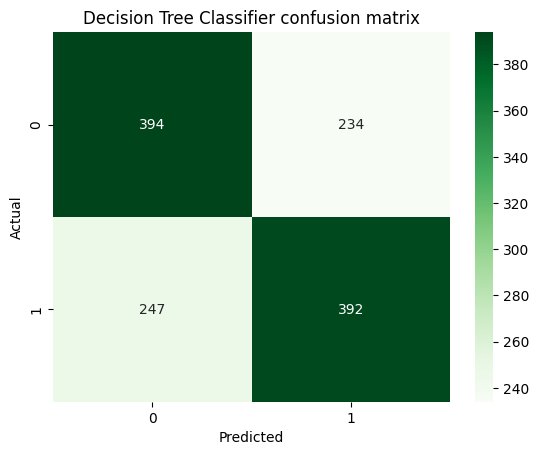

In [21]:
sns.heatmap(cm1,annot = True,fmt = "d",cmap = "Greens")
plt.title('Decision Tree Classifier confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest Classifier

### Training the model on the dataset

In [22]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

### Predicting the result

In [23]:
y_pred2 = rfc.predict(X_test)
cm2 = confusion_matrix(y_test,y_pred2)
print('Random Forest Classifier')
print(f'\nAccuracy Score : {accuracy_score(y_test,y_pred2):.4f}')
print('\n',classification_report(y_test,y_pred2))

Random Forest Classifier

Accuracy Score : 0.6882

               precision    recall  f1-score   support

        FAKE       0.68      0.70      0.69       628
        REAL       0.69      0.68      0.69       639

    accuracy                           0.69      1267
   macro avg       0.69      0.69      0.69      1267
weighted avg       0.69      0.69      0.69      1267



### Visualisation of the result

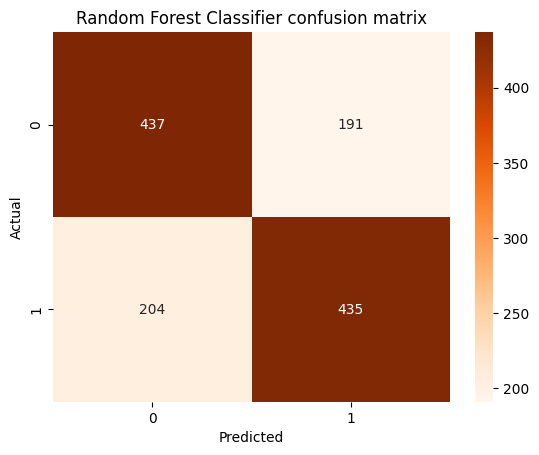

In [24]:
sns.heatmap(cm2,annot = True,fmt = 'd',cmap = 'Oranges')
plt.title('Random Forest Classifier confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## K-NN

### Training the model on the dataset

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

### Predicting the result

In [26]:
y_pred3 = model.predict(X_test)
cm3 = confusion_matrix(y_test,y_pred2)
print('K-NN')
print(f'\nAccuracy Score : {accuracy_score(y_test,y_pred2):.4f}')
print('\n',classification_report(y_test,y_pred2))

K-NN

Accuracy Score : 0.6882

               precision    recall  f1-score   support

        FAKE       0.68      0.70      0.69       628
        REAL       0.69      0.68      0.69       639

    accuracy                           0.69      1267
   macro avg       0.69      0.69      0.69      1267
weighted avg       0.69      0.69      0.69      1267



### Visualisation of the result

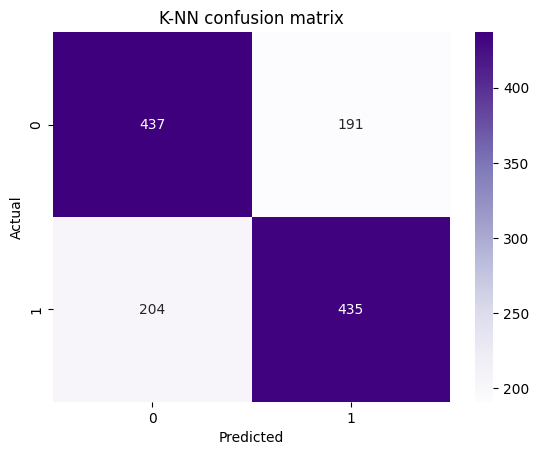

In [27]:
sns.heatmap(cm3,annot = True,fmt = 'd',cmap = 'Purples')
plt.title('K-NN confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM Model

### Training the model on the dataset

In [28]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

### Predicting the result

In [29]:
y_pred4 = model.predict(X_test)
cm4 = confusion_matrix(y_test,y_pred2)
print('SVM')
print(f'\nAccuracy Score : {accuracy_score(y_test,y_pred2):.4f}')
print('\n',classification_report(y_test,y_pred2))

SVM

Accuracy Score : 0.6882

               precision    recall  f1-score   support

        FAKE       0.68      0.70      0.69       628
        REAL       0.69      0.68      0.69       639

    accuracy                           0.69      1267
   macro avg       0.69      0.69      0.69      1267
weighted avg       0.69      0.69      0.69      1267



### Visualisation of the result

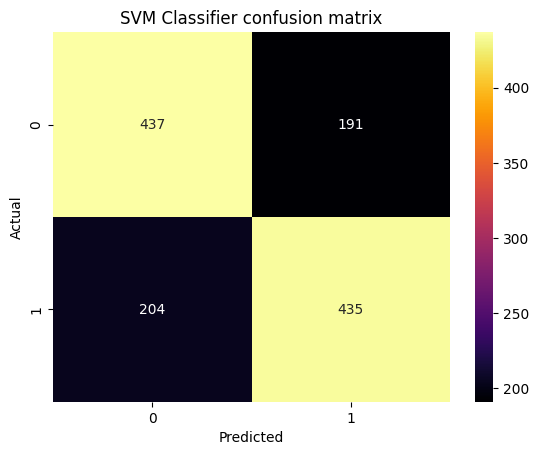

In [30]:
sns.heatmap(cm4,annot = True,fmt = 'd',cmap = 'inferno')
plt.title('SVM Classifier confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### News Predictors

In [31]:
def predict_news_from_input(model=rfc):
    import re

    def clean_text(text):
        text = text.lower()
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    # Take user input
    title = input("Enter the news title: ")
    text = input("Enter the news content/body: ")

    # Clean the text
    title_clean = clean_text(title)
    text_clean = clean_text(text)

    # Extract features
    features = {
        'title_length': len(title_clean),
        'text_length': len(text_clean),
        'title_word_count': len(title_clean.split()),
        'text_word_count': len(text_clean.split()),
        'num_exclamations': text.count('!'),  # Use raw text
        'num_uppercase_words': sum(1 for word in text.split() if word.isupper())  # Use raw text
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([features])

    # Make prediction
    prediction = model.predict(input_df)[0]
    label = "REAL" if prediction == 1 else "FAKE"
    print(f"\nThe news is predicted to be: {label}")


In [32]:
predict_news_from_input()


The news is predicted to be: FAKE


#### Sample News

Title = 'The Battle of New York: Why This Primary Matters'
Text = 'It's primary day in New York and front-runners Hillary Clinton and Donald Trump are leading in the polls.
Trump is now vowing to win enough delegates to clinch the Republican nomination and prevent a contested convention. But Sens.Ted Cruz, R-Texas, Bernie Sanders, D-Vt., and Ohio Gov. John Kasich and aren't giving up just yet.
A big win in New York could tip the scales for both the Republican and Democratic front-runners in this year's race for the White House. Clinton and Trump have each suffered losses in recent contests, shifting the momentum to their rivals.
""We have won eight out of the last nine caucuses and primaries! Cheer!"" Sanders recently told supporters.
While wins in New York for Trump and Clinton are expected, the margins of those victories are also important.
Trump needs to capture more than 50 percent of the vote statewide if he wants to be positioned to win all of the state's 95 GOP delegates. That would put him one step closer to avoiding a contested convention.
""We've got to vote and you know Cruz is way, way down in the polls,"" Trump urged supporters.
Meanwhile, Sanders is hoping for a close race in the Empire State. A loss by 10 points means he'll need to win 80 percent of the remaining delegates to clinch the nomination.
Despite a predicted loss in New York, Cruz hasn't lost momentum. He's hoping to sweep up more delegates this weekend while he's talking about how he can win in November.
""Because if I'm the nominee, we win the General Election,"" Cruz promised his supporters. ""We're beating Hillary in the key swing states, we're beating Hillary with Independents, we're beating Hillary with young people.""
For now, Cruz, Kasich, and Sanders have all moved on from New York to other states. Trump and Clinton are the only two staying in their home state to watch the results come in.'

Title = 'Watch The Exact Moment Paul Ryan Committed Political Suicide At A Trump Rally (VIDEO)'
Text = 'Google Pinterest Digg Linkedin Reddit Stumbleupon Print Delicious Pocket Tumblr 
There are two fundamental truths in this world: Paul Ryan desperately wants to be president. And Paul Ryan will never be president. Today proved it. 
In a particularly staggering example of political cowardice, Paul Ryan re-re-re-reversed course and announced that he was back on the Trump Train after all. This was an aboutface from where he was a few weeks ago. He had previously declared he would not be supporting or defending Trump after a tape was made public in which Trump bragged about assaulting women. Suddenly, Ryan was appearing at a pro-Trump rally and boldly declaring that he already sent in his vote to make him President of the United States. It was a surreal moment. The figurehead of the Republican Party dosed himself in gasoline, got up on a stage on a chilly afternoon in Wisconsin, and lit a match. . @SpeakerRyan says he voted for @realDonaldTrump : “Republicans, it is time to come home” https://t.co/VyTT49YvoE pic.twitter.com/wCvSCg4a5I 
— ABC News Politics (@ABCPolitics) November 5, 2016 
The Democratic Party couldn’t have asked for a better moment of film. Ryan’s chances of ever becoming president went down to zero in an instant. In the wreckage Trump is to leave behind in his wake, those who cravenly backed his campaign will not recover. If Ryan’s career manages to limp all the way to 2020, then the DNC will have this tape locked and loaded to be used in every ad until Election Day. 
The ringing endorsement of the man he clearly hates on a personal level speaks volumes about his own spinelessness. Ryan has postured himself as a “principled” conservative, and one uncomfortable with Trump’s unapologetic bigotry and sexism. However, when push came to shove, Paul Ryan – like many of his colleagues – turned into a sniveling appeaser. After all his lofty tak about conviction, his principles were a house of cards and collapsed with the slightest breeze. 
What’s especially bizarre is how close Ryan came to making it through unscathed. For months the Speaker of the House refused to comment on Trump at all. His strategy seemed to be to keep his head down, pretend Trump didn’t exist, and hope that nobody remembered what happened in 2016. Now, just days away from the election, he screwed it all up. 
If 2016’s very ugly election has done any good it’s by exposing the utter cowardice of the Republicans who once feigned moral courage. A reality television star spit on them, hijacked their party, insulted their wives, and got every last one of them to kneel before him. What a turn of events. 
Featured image via Twitter'